# PTSNet - Analytics Functionalities
The analytics functionalities allow users to determine the: 

- time step that best fits their application (`plot_wave_speed_error`);
- number of processors that best fit their application (`compute_num_processors`);
- simulation times (`compute_simulation_times`); 

Currently, the parallel version of PTSNet is only available of Linux and Mac OS. Any analytics functionality that requires parallel PTSNet will not work on Windows.

## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ptsnet.simulation.sim import PTSNETSimulation
from ptsnet.utils.io import get_example_path
from ptsnet.graphics.static import plot_wave_speed_error
from ptsnet.utils.analytics import compute_num_processors
from ptsnet.utils.analytics import compute_simulation_times

## Plotting Wave Speed Error

Users can plot the wave speed error for a given time step to assess the relative wave speed adjustment to help determine the time step for the simulation using the `plot_wave_speed_error` function. The function requires:  
- `sim` - simulation instance;
- `file name` - name of the file to save the plot;
- `intervals` - for the plot;

Note, users don't need to execute the simulation. We will use the large network BWSNII to illustrate this functionality. 

/home/gandresr/miniconda3/envs/ptsnet/lib/python3.8/site-packages/wntr/epanet/io.py:2192: UserWarning: Not all curves were used in "/home/gandresr/Documents/GitHub/ptsnet/ptsnet/examples/BWSN_F.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


PTSNETSimulation <duration = 20 [s] | time_steps = 200 | num_points = 46,642>


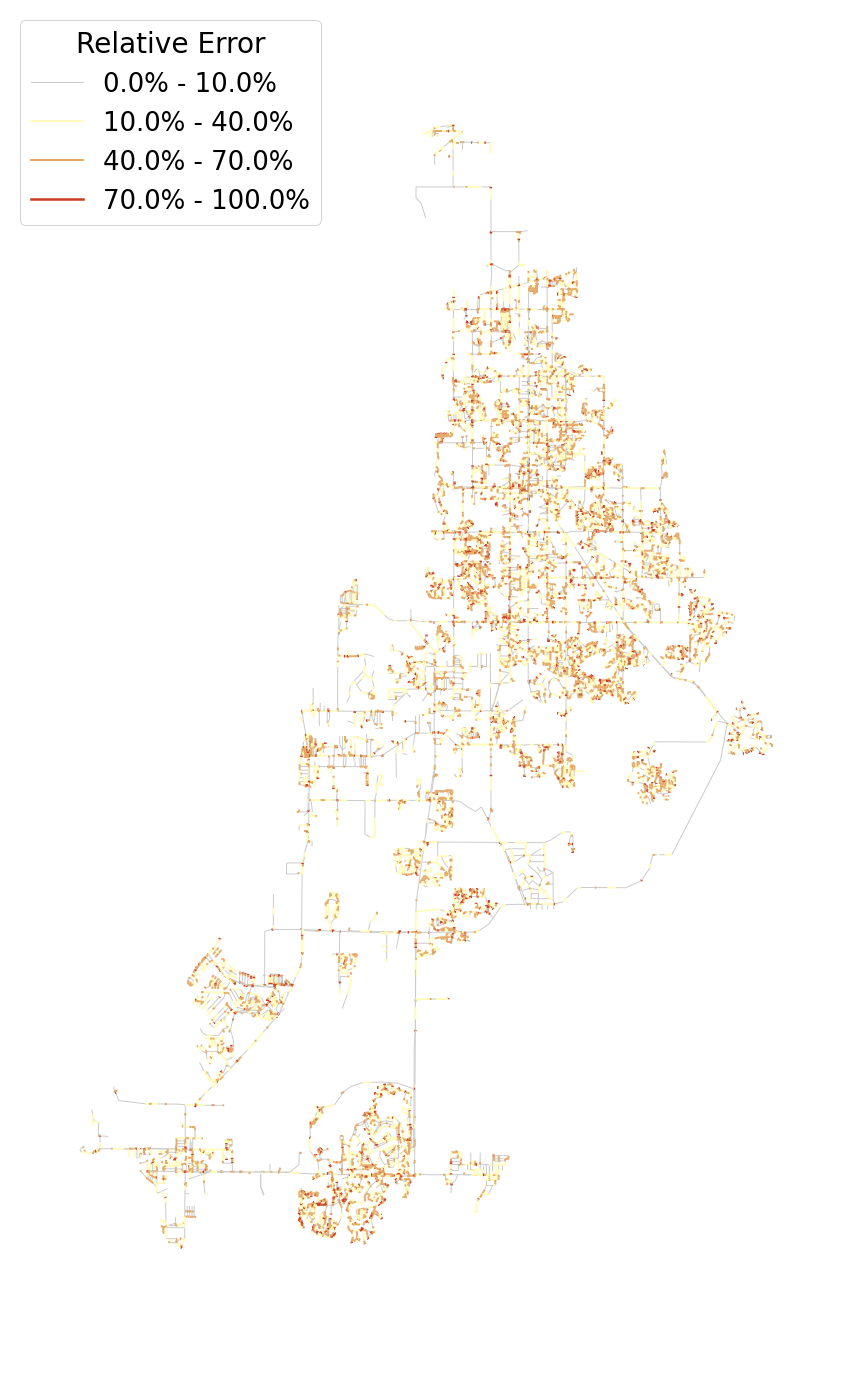

In [2]:
# create a simulation
# set large time step (0.1s) and 'user' wave speed adjustment method

sim = PTSNETSimulation(workspace_name="plot_wave_speed", inpfile = get_example_path('BWSN_F'), settings = {
        'time_step' : 0.1, 'wave_speed_method' : 'user'}); 

# print the number of timesteps and points in the numerical grid (depends on the time step)
print(sim)

# plot wave speed adjustments
plot_wave_speed_error(sim, 'BWSNerror1.pdf', intervals = [0, 10, 40, 70, 100])
plt.show()

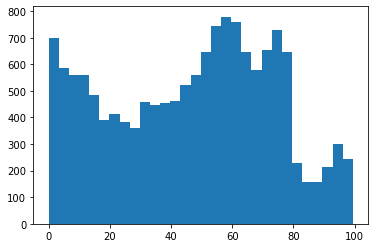

In [3]:
# Users can extract the wave speed adjustment associated with pipes as follows:
plt.hist(sim.ss['pipe'].wave_speed_adjustment, 30)
plt.show()

### Choose a smaller time step

/home/gandresr/miniconda3/envs/ptsnet/lib/python3.8/site-packages/wntr/epanet/io.py:2192: UserWarning: Not all curves were used in "/home/gandresr/Documents/GitHub/ptsnet/ptsnet/examples/BWSN_F.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


PTSNETSimulation <duration = 20 [s] | time_steps = 20000 | num_points = 1,859,159>


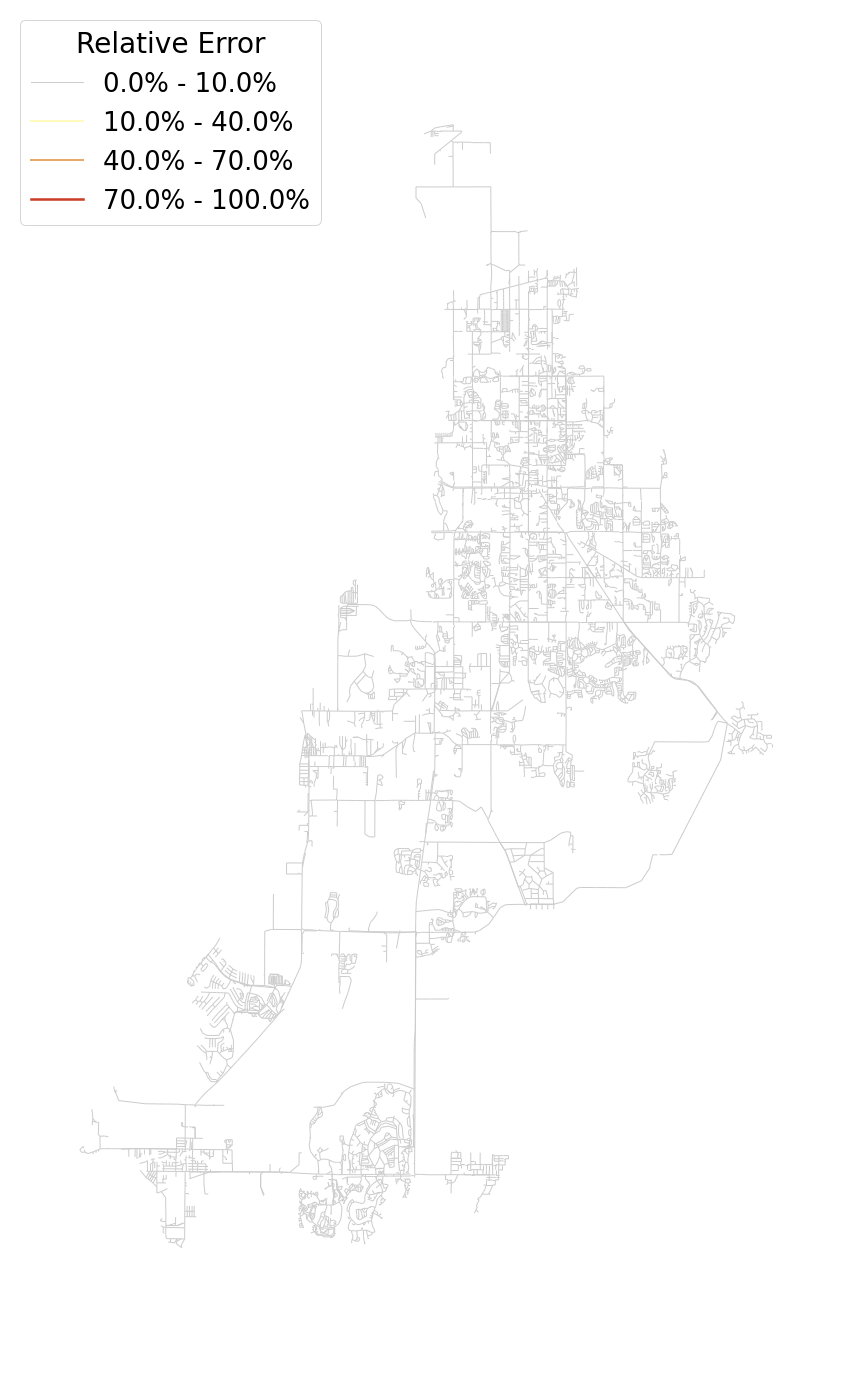

In [4]:
# create a simulation
# set small time step (0.001s) and 'user' wave speed adjustment method

sim = PTSNETSimulation(workspace_name="plot_wave_speed", inpfile = get_example_path('BWSN_F'), settings = {
        'time_step' : 0.001, 'wave_speed_method' : 'user'}); 

# print the number of timesteps and points in the numerical grid (depends on the time step)
print(sim)

# plot wave speed adjustments
plot_wave_speed_error(sim, 'BWSNerror2.pdf', intervals = [0, 10, 40, 70, 100])
plt.show()

---

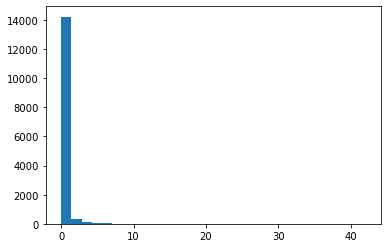

In [5]:
# Users can extract the wave speed adjustment associated with pipes as follows:
plt.hist(sim.ss['pipe'].wave_speed_adjustment, 30)
plt.show()

## Determining Number of Processors
First, a PTSNETSimulation is created and, then, the `compute_num_processors` function is executed. The function computes the average running time per step for each processor for different number of processors and a fixed time step defined by the user. Users can specify the number of steps that they want to compute, instead of running a full simulation. 

The function creates a script that needs to be executed from the command line. This must be directly done on a terminal. The command will not work correctly if executed from a Jupyter Notebook. The `compute_num_processors` requires the following input:
- `sim` - simulation;
- `plot` - if True plots average running-time per time step as a function of the number of processors;
- `count` - count of processors that you want to test, from 1 to max_num_processors. If max_num_processors is 8 and count is 4, then, the method will compute what's the best number of processors testing for 1, 3, 6, and 8 processors;
- `steps` - number of steps that the user wants to compute to estimate the number of processors. In a simulation with duration 20 seconds and time step of 0.01 there are 2000 steps. However, for determining the best number of processors it may suffice to execute just 1000 steps to have an estimate of the running-times;
- `max_num_processors` - maximum number of processors that will be tested;

In [6]:
# create simulation
sim = PTSNETSimulation(
    workspace_name = "num_processors",
    inpfile = 'networks/TNET3.inp',
    settings = {
        'time_step' : 0.01,
        'save_results' : True,
        'default_wave_speed' : 1000,
        'wave_speed_method' : 'user'
})

# run this function
compute_num_processors(sim, plot = False, count = 4, steps = 1000, max_num_processors = 8)


Execute the following commands on your terminal:
cd /home/gandresr/Documents/GitHub/test codes
bash /home/gandresr/Documents/GitHub/test codes/workspaces/tmp/compute_num_processors.sh



---

## Estimating Simulation Times
First, a PTSNETSimulation is created and, then, the `compute_simulation_times` function is executed. The function estimates the total amount of time that will be required to execute the simulations for different time steps and a given number of processors. 
Users can specify the number of steps that they want to compute, instead of running a full simulation. 

The function creates a script that need to be executed from the command line. This must be directly done on a terminal. The command will not work correctly if executed from a Jupyter Notebook.

The `compute_simulation_times` requires the following input:
- `inpfile` - is the .inp file;
- `time_steps` - simulation;
- `plot` - if True plots average running-time per time step as a function of the number of processors;
- `steps` - number of steps that the user wants to compute to estimate the number of processors. In a simulation with duration 20 seconds and time step of 0.01 there are 2000 steps. However, for determining the best number of processors it may suffice to execute just 100 steps to have an estimate of the running-times;
- `count` - count of processors that you want to test, from 1 to max_num_processors. If max_num_processors is 8 and count is 4, then, the method will compute what's the best number of processors testing for 1, 3, 6, and 8 processors;
- `duration` - simulation time that wants to be tested. For example, since the compute_simulation_times will run just for a few steps, not the whole simulation, an average running-time per time-step (ARPT) is estimated, and based on that value an estimate of the running-time for the whole simulation is computed by multiplying ARPT\*duration
- `max_num_processors` - maximum number of processors that will be tested;

In [7]:
compute_simulation_times(
    inpfile = 'networks/TNET3.inp',
    time_steps = [0.0005*ii for ii in range(1,4)],
    plot = False,
    steps = 100,
    count = 4,
    duration = 20,
    max_num_processors = 8
)


Execute the following commands on your terminal:
cd /home/gandresr/Documents/GitHub/test codes
bash /home/gandresr/Documents/GitHub/test codes/workspaces/tmp/compute_times_per_step.sh

